<a href="https://colab.research.google.com/github/dnarna909/5201_Term-Project/blob/main/Term%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [5]:
packageList <- c("dplyr", "keras","jpeg", "ggplot2", "rio")
for(package in packageList){
  if(!require(package,character.only = TRUE)){
    install.packages(package);require(package,character.only = TRUE);}
    }

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: keras

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘keras’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Loading required package: keras

Loading required package: jpeg

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘jpeg’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: jpeg

Loading required package: ggplot2

Loading required package: rio

Wa

In [3]:
df <- read.csv("NHANES for ML.csv", row.names=1)
# table(df$HbA1c)
colnames(df)
table(df$diagnosed.diabetes)
table(df$diagnosed.kidney.disease)
table(df$diagnosed.diabetes, df$diagnosed.kidney.disease, dnn = list("diabetes", "kidney.disease"))
table(df$KIQ022)
table(df$DIQ010)
# table(df$URDACT)
table(df$PA_level)

[1] "Study.ID"                 "RIAGENDR"                
 [3] "RIDAGEYR"                 "DMDEDUC2"                
 [5] "INDFMPIR"                 "HbA1c"                   
 [7] "DIQ010"                   "diagnosed.diabetes"      
 [9] "KIQ022"                   "URDACT"                  
[11] "diagnosed.kidney.disease" "Work.VPA.MIN"            
[13] "Recreational.VPA.MIN"     "Work.MPA.MIN"            
[15] "Recreational.MIN"         "Transport.MIN"           
[17] "total_MIN"                "PA_level"                
[19] "BMXWT"                    "BMXBMI"


    0     1 
21788  4104 


    0     1 
25047   845 

        kidney.disease
diabetes     0     1
       0 21292   496
       1  3755   349


    1     2 
  845 25047 


    1     2     3 
 3452 21788   652 


     Active    Inactive Very Active 
       3291       10756       11845 

[1] 25892    20

Warning message:
“`add_rownames()` was deprecated in dplyr 1.0.0.
Please use `tibble::rownames_to_column()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


[1] "Study.ID"                 "RIAGENDR"                
 [3] "RIDAGEYR"                 "DMDEDUC2"                
 [5] "INDFMPIR"                 "HbA1c"                   
 [7] "DIQ010"                   "diagnosed.diabetes"      
 [9] "KIQ022"                   "URDACT"                  
[11] "diagnosed.kidney.disease" "Work.VPA.MIN"            
[13] "Recreational.VPA.MIN"     "Work.MPA.MIN"            
[15] "Recreational.MIN"         "Transport.MIN"           
[17] "total_MIN"                "BMXWT"                   
[19] "BMXBMI"

[1] "PA_level"

[1] 0

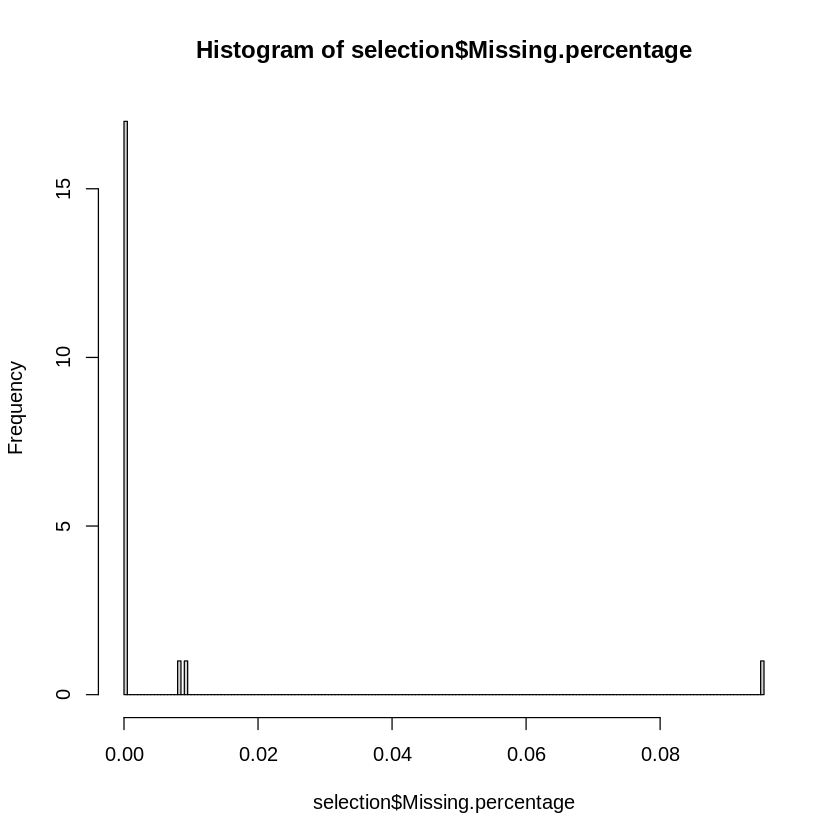

In [6]:
dim(df)
# create selection dataframe for columns to avoid NA
selection <- sapply(df, function(xx) {c("Missing.numbers" = sum(is.na(xx)), 
                             "Missing.percentage" = sum(is.na(xx))/nrow(df),
                             "Is.numeric" = is.numeric(xx),  
                             "Median.values" = ifelse( is.numeric(xx), median(xx, na.rm = TRUE), 999999999) ) }) %>% 
  t %>% as.data.frame() %>% add_rownames 
hist(selection$Missing.percentage, breaks = 200)

select.names <- subset(selection, Missing.percentage < 0.1 & Is.numeric == 1)$rowname # set 10% as the cutting line to select columns
select.names
character.names <- subset(selection, Is.numeric == 0)$rowname 
character.names
df1 <- df[, c(character.names, select.names)] 

# delete rows with NA vaules
df2 <- df1
for (col in select.names) {df2 <- subset(df2, !is.na(df2[[col]]))}
sum(is.na(df2))